In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
df = pd.read_csv("house_data.csv")
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Removing Outliers

In [7]:
df = df.drop(['date','id','floors','waterfront','view','sqft_basement','yr_renovated'],axis=1)
print(df.shape)
df.head()

(21613, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [8]:
comp = df.copy()
for i in df.columns:
    comp[str(i)+' zscore'] = ( df[i] - df[i].mean() ) / df[i].std()
comp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,...,sqft_lot zscore,condition zscore,grade zscore,sqft_above zscore,yr_built zscore,zipcode zscore,lat zscore,long zscore,sqft_living15 zscore,sqft_lot15 zscore
0,221900.0,3,1.00,1180,5650,3,7,1180,1955,98178,...,-0.228316,-0.629172,-0.558823,-0.734691,-0.544885,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,538000.0,3,2.25,2570,7242,3,7,2170,1951,98125,...,-0.189881,-0.629172,-0.558823,0.460830,-0.681063,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,180000.0,2,1.00,770,10000,3,6,770,1933,98028,...,-0.123296,-0.629172,-1.409554,-1.229805,-1.293862,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,604000.0,4,3.00,1960,5000,5,7,1050,1965,98136,...,-0.244009,2.444237,-0.558823,-0.891678,-0.204441,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,510000.0,3,2.00,1680,8080,3,8,1680,1987,98074,...,-0.169649,-0.629172,0.291909,-0.130892,0.544535,-0.073634,0.409541,1.199307,-0.272184,-0.192844


In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
comp.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'price zscore',
       'bedrooms zscore', 'bathrooms zscore', 'sqft_living zscore',
       'sqft_lot zscore', 'condition zscore', 'grade zscore',
       'sqft_above zscore', 'yr_built zscore', 'zipcode zscore', 'lat zscore',
       'long zscore', 'sqft_living15 zscore', 'sqft_lot15 zscore'],
      dtype='object')

In [11]:
thres = 3
for i in df.columns:
    comp = comp[comp[str(i)+' zscore']<thres]
    comp = comp[comp[str(i)+' zscore']>-thres]
print(comp.shape)
comp.head()

(20105, 28)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,...,sqft_lot zscore,condition zscore,grade zscore,sqft_above zscore,yr_built zscore,zipcode zscore,lat zscore,long zscore,sqft_living15 zscore,sqft_lot15 zscore
0,221900.0,3,1.00,1180,5650,3,7,1180,1955,98178,...,-0.228316,-0.629172,-0.558823,-0.734691,-0.544885,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,538000.0,3,2.25,2570,7242,3,7,2170,1951,98125,...,-0.189881,-0.629172,-0.558823,0.460830,-0.681063,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,180000.0,2,1.00,770,10000,3,6,770,1933,98028,...,-0.123296,-0.629172,-1.409554,-1.229805,-1.293862,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,604000.0,4,3.00,1960,5000,5,7,1050,1965,98136,...,-0.244009,2.444237,-0.558823,-0.891678,-0.204441,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,510000.0,3,2.00,1680,8080,3,8,1680,1987,98074,...,-0.169649,-0.629172,0.291909,-0.130892,0.544535,-0.073634,0.409541,1.199307,-0.272184,-0.192844


In [12]:
comp = comp[df.columns]
comp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


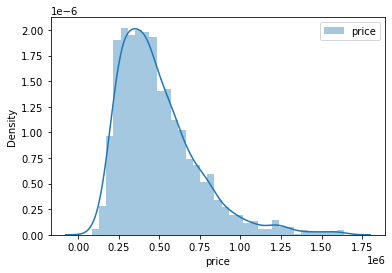

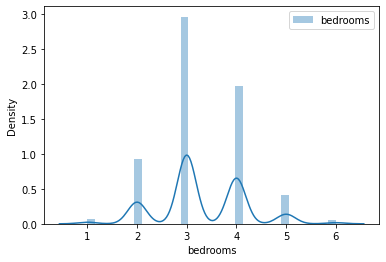

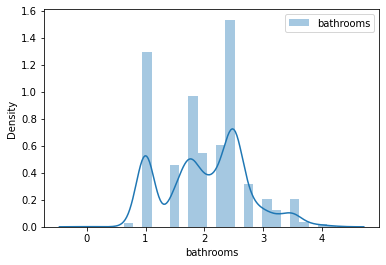

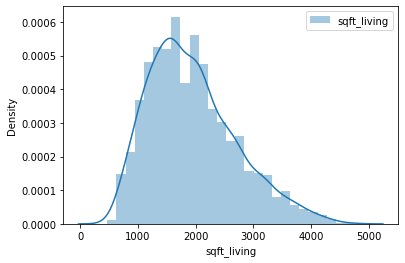

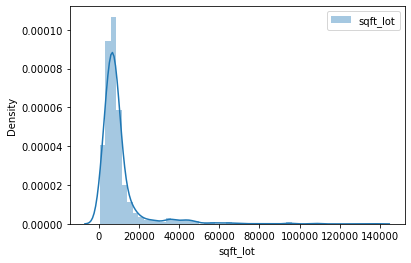

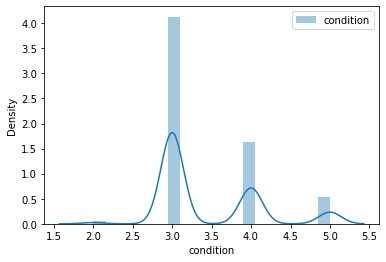

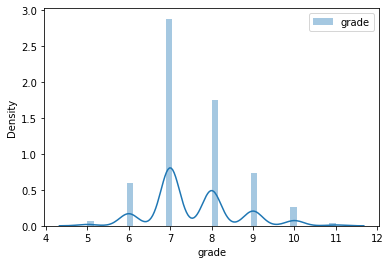

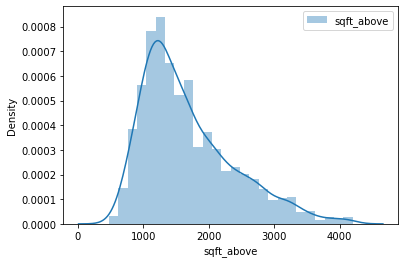

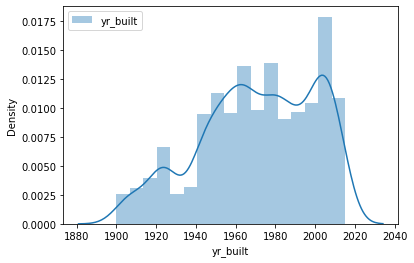

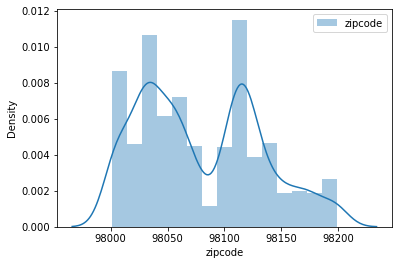

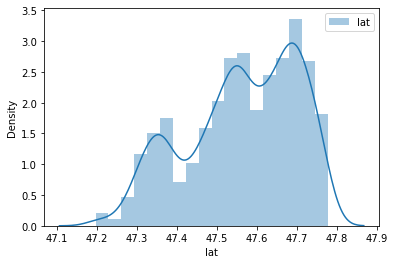

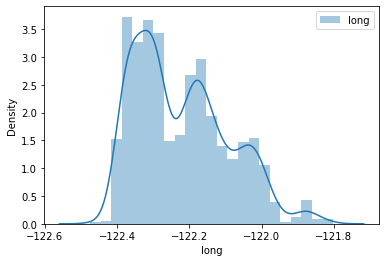

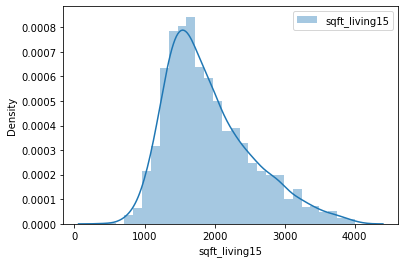

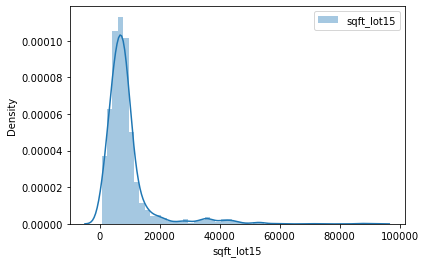

In [13]:
plot = comp.sample(2000)
for i in plot.columns:
    sns.distplot(plot[i],label=str(i))
    plt.legend()
    plt.show()

In [19]:
x = pd.DataFrame(preprocessing.scale(comp),columns=comp.columns)
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.225454,-0.381076,-1.596328,-1.116743,-0.387253,-0.650735,-0.598395,-0.759199,-0.744150,2.031705,-0.400769,-0.263785,-1.009655,-0.401670
1,0.363646,-0.381076,0.340537,1.023148,-0.214890,-0.650735,-0.598395,0.835260,-0.897255,0.980335,1.121387,-0.786631,-0.358651,-0.134510
2,-1.436094,-1.672079,-1.596328,-1.747934,0.083714,-0.650735,-1.709517,-1.419530,-1.586229,-0.943869,1.244001,-0.061394,1.557160,-0.077693
3,0.222884,-0.381076,-0.046836,-0.346998,-0.124161,-0.650735,0.512727,0.046084,0.480693,-0.031360,0.365388,1.524008,-0.154050,-0.152777
4,-1.046485,-0.381076,0.340537,-0.293116,-0.260687,-0.650735,-0.598395,0.102453,0.786904,-1.439798,-1.862706,-0.854094,0.660634,-0.244651


In [20]:
x.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04,1.474700e+04
mean,-1.054287e-16,-3.114978e-16,-8.993913e-15,-7.590200e-17,-2.807215e-16,-1.548563e-14,9.612904e-15,-8.830892e-17,1.562684e-15,-1.020098e-13,1.806200e-14,-6.786190e-15,-2.059487e-16,4.322168e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.928760e+00,-1.672079e+00,-1.983701e+00,-2.071227e+00,-9.370391e-01,-6.507347e-01,-1.709517e+00,-1.886593e+00,-2.351756e+00,-1.479473e+00,-2.055696e+00,-2.228671e+00,-2.348863e+00,-1.073130e+00
25%,-7.523939e-01,-3.810765e-01,-8.215818e-01,-7.780552e-01,-4.576274e-01,-6.507347e-01,-5.983950e-01,-7.591986e-01,-7.441500e-01,-8.645206e-01,-6.782829e-01,-8.962593e-01,-7.678537e-01,-4.889774e-01
50%,-1.843195e-01,-3.810765e-01,3.405373e-01,-1.160744e-01,-2.020061e-01,-6.507347e-01,-5.983950e-01,-2.438180e-01,9.792950e-02,-3.289173e-01,6.066635e-02,-5.296077e-02,-1.540502e-01,-1.573441e-01
75%,5.538001e-01,9.099262e-01,7.279103e-01,6.844604e-01,6.260148e-02,1.536725e+00,5.127270e-01,6.258866e-01,9.017326e-01,8.216380e-01,8.812374e-01,7.228739e-01,6.643545e-01,1.222406e-01
max,4.056129e+00,2.200929e+00,2.277402e+00,3.086065e+00,9.574616e+00,1.536725e+00,2.734971e+00,2.880676e+00,1.552430e+00,2.031705e+00,1.532035e+00,2.468502e+00,2.728966e+00,7.791378e+00


In [22]:
x.shape

(14747, 14)

In [24]:
data = x.sample(1000)
print(data.shape)
data.head(3)

(1000, 14)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6035,1.303734,0.909926,0.727910,2.331715,2.293468,-0.650735,1.623849,2.848465,0.518969,0.028152,1.509544,1.161389,1.966362,5.006814
9228,-0.028476,-1.672079,-1.596328,-1.563195,-0.771605,1.536725,-1.709517,-1.435636,-2.122098,0.623266,0.649794,-1.123950,-0.526052,-0.589717
4707,-0.436685,2.200929,0.727910,1.284862,-0.414320,-0.650735,0.512727,1.753282,1.169667,-0.884358,-1.181436,0.174730,1.891961,-0.425042


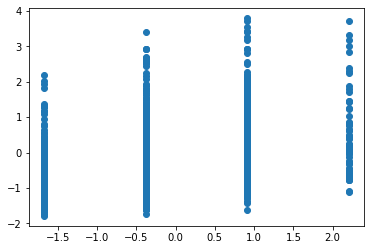

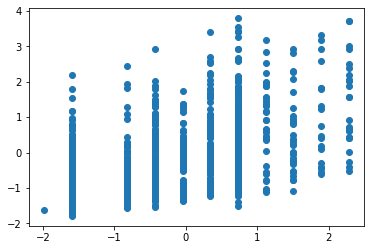

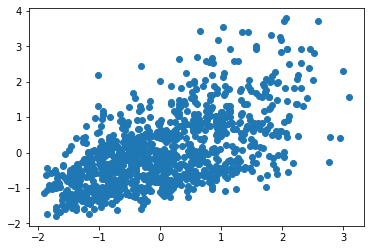

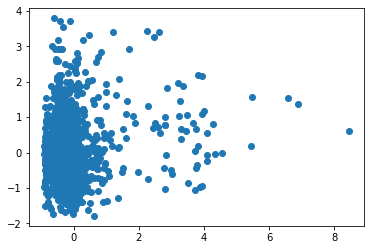

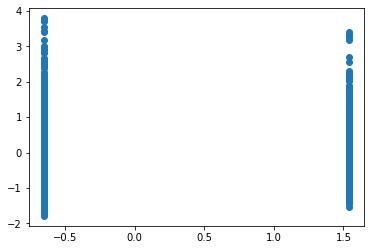

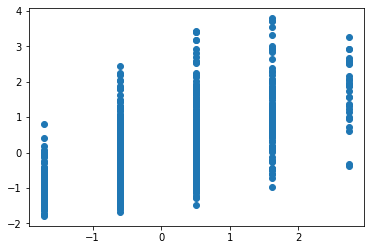

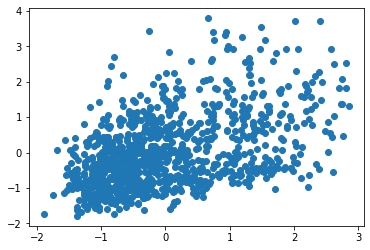

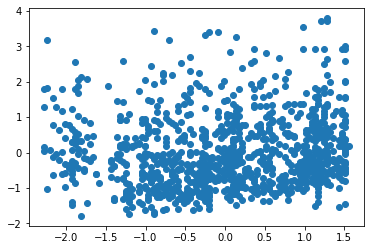

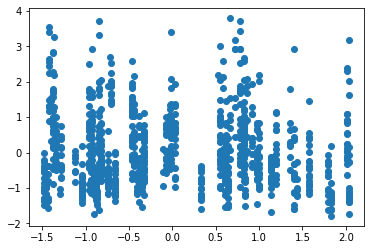

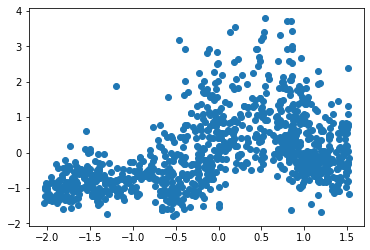

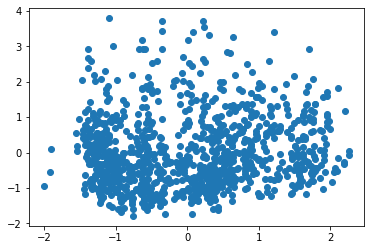

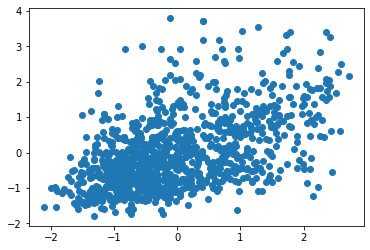

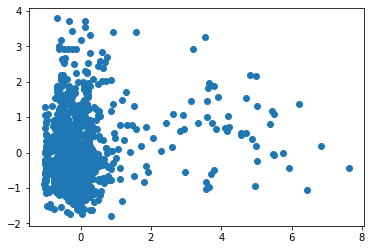

In [26]:
for i in data.columns[1:]:
    plt.scatter(data[i],data.price)
    plt.plot()
    plt.show()

## Hypothesis Testing
##  Pearson’s Correlation Coefficient
### Tests whether two samples have a linear relationship. 

### Interpretation
### H0: the two samples are independent.
### H1: there is a dependency between the samples.

In [27]:
data.shape

(1000, 14)

In [54]:
def stat(deg_fr=None,alpha=0.05,x=x):
    P = [ ]
    D = [ ]
    if deg_fr == None:
        deg_fr = 100
    print(f'Degree of Freedom: {deg_fr}\nSignicicance value {alpha}')
    df_rand = x.sample(n=deg_fr+2,random_state=23)
    for i in x.columns[1:]:
        x,y = df_rand[i],df_rand['price']
        r,p = pearsonr(x,y)
        t = r*np.sqrt(deg_fr/(1 - r*r))
        p_calc = stats.t.sf(abs(t),deg_fr)*2
#         print(f'Feature :{i} Degree of freedom : {deg_fr} r : {r} T value :{t} calculated p :{p_calc}')
        if p_calc > alpha:
            P.append([r,t,p_calc,"Independent"])
        else:
            P.append([r,t,p_calc,"Dependent"])
            D.append(i)
    return D,pd.DataFrame(P,index = df.columns[:-1],columns=["Pearson's Coefficient","T value ","P value","Hypothesis result"])
        

## Interpet with degree of freedom and level of significance

In [73]:
Dept_features, res = stat(deg_fr = 500,alpha = 0.005)
print('Dependent Features are' ,Dept_features)
res

Degree of Freedom: 500
Signicicance value 0.005
Dependent Features are ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']


,Pearson's Coefficient,T value,P value,Hypothesis result
price,0.258462,5.982679,4.186502e-09,Dependent
bedrooms,0.363327,8.720171,4.125775e-17,Dependent
bathrooms,0.570547,15.534347,1.086027e-44,Dependent
sqft_living,0.070968,1.590895,1.122651e-01,Independent
sqft_lot,0.062939,1.410147,1.591181e-01,Independent
condition,0.622096,17.766983,4.182885e-55,Dependent
grade,0.479298,12.211465,3.388859e-30,Dependent
sqft_above,0.002673,0.059763,9.523685e-01,Independent
yr_built,-0.068252,-1.529739,1.267137e-01,Independent
zipcode,0.415572,10.216459,2.214289e-22,Dependent


## Model Building

In [74]:
X = x[Dept_features]
y = x.price
X.head()

,bedrooms,bathrooms,sqft_living,grade,sqft_above,lat,sqft_living15
0,-0.381076,-1.596328,-1.116743,-0.598395,-0.759199,-0.400769,-1.009655
1,-0.381076,0.340537,1.023148,-0.598395,0.835260,1.121387,-0.358651
2,-1.672079,-1.596328,-1.747934,-1.709517,-1.419530,1.244001,1.557160
3,-0.381076,-0.046836,-0.346998,0.512727,0.046084,0.365388,-0.154050
4,-0.381076,0.340537,-0.293116,-0.598395,0.102453,-1.862706,0.660634


In [75]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
w = pd.DataFrame([X.columns,model.coef_]).T
w.columns = ["Attributes",'weights']
w

,Attributes,weights
0,bedrooms,-0.0449987
1,bathrooms,-0.0386284
2,sqft_living,0.399456
3,grade,0.320486
4,sqft_above,-0.0878216
5,lat,0.399915
6,sqft_living15,0.117359


In [78]:
model.intercept_

-0.0012985902462942511

In [79]:
model.score(X_test,y_test)

0.5757564232508089